In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import fdasrsf
import math
import pandas as pd

In [ ]:
# for curvature
T = 1000
K = 7
t = np.arange(T).astype(np.float)

# (n = dimension, T = points per curve, K = number of curves)
beta = np.zeros((T, K))

curvature = []
for i in range(K): 
    df = pd.read_csv('/work/PaHaW_spirals/000'+str(26+i)+'__1_1.csv', header = None)
    xs = df[0]
    ys = df[1]
    ts = df[2]
    newXs = np.interp(np.linspace(np.min(ts), np.max(ts), T), ts, xs)
    newYs = np.interp(np.linspace(np.min(ts), np.max(ts), T), ts, ys)

    lst = [[newXs[i], newYs[i]] for i in range(len(newXs))]

    # finding dx_dt, dy_dt, d2x_dt2, d2y_dt2
    coordinates = np.array(lst)
    dx_dt = np.gradient(coordinates[:, 0])
    dy_dt = np.gradient(coordinates[:, 1])
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)

    # calculate curvature using curvature formula for 2D plane curves
    curvature.append(np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5)
    beta[:, i] = np.array(curvature[i])

print (beta)
# create a curve registration object for curvature
output = fdasrsf.time_warping.fdawarp(beta, np.arange(T).astype(np.float))
# align curves
output.srsf_align()

[[3.05687429e-02 5.11634762e-03 0.00000000e+00 ... 1.83356900e-02
             nan 3.74505311e-04]
 [3.67531621e-01 1.32425397e-02 0.00000000e+00 ... 3.08298524e-01
  0.00000000e+00 1.13709505e-03]
 [1.00000000e+00 1.24242181e-01 0.00000000e+00 ... 5.28949180e-02
  0.00000000e+00 4.61146818e-03]
 ...
 [3.71093561e-02 1.05043069e-03            nan ... 2.86978184e-03
  1.50246286e-03 3.85603958e-03]
 [4.68055016e-02 4.95088754e-04 0.00000000e+00 ... 7.07795716e-03
  9.30669131e-04 6.10913069e-03]
 [2.75547396e-02 2.42540988e-04 0.00000000e+00 ... 4.91763784e-03
  5.53444980e-04 1.46123218e-02]]
Initializing...
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(t, output.fn)
plt.plot(t, output.fmean - output.fmean[0], 'k--')
plt.title('Aligned Functions', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)

plt.figure()
plt.plot(t, output.gam)
plt.plot(t, t, 'k--')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Initial Time Axis', fontsize=12)
plt.ylabel('Final Time Axis', fontsize=12)
plt.title('Warping Functions', fontsize=14)
plt.show()

In [ ]:
plt.plot(output.fn[:, 5])

In [ ]:
df1 = pd.read_csv('/work/PaHaW_spirals/00027__1_1.csv', header = None)
xs = df1[0]
ys = df1[1]
ts = df1[2]
newXs = np.interp(np.linspace(np.min(ts), np.max(ts), 1000), ts, xs)
newYs = np.interp(np.linspace(np.min(ts), np.max(ts), 1000), ts, ys)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(xs, ys, 'ro')
plt.subplot(1, 2, 2)
plt.plot(newXs, newYs, 'bo')

lst = [[newXs[i], newYs[i]] for i in range(len(newXs))]

# finding dx_dt, dy_dt, d2x_dt2, d2y_dt2
coordinates = np.array(lst)
dx_dt = np.gradient(coordinates[:, 0])
dy_dt = np.gradient(coordinates[:, 1])
d2x_dt2 = np.gradient(dx_dt)
d2y_dt2 = np.gradient(dy_dt)

# calculate curvature using curvature formula for 2D plane curves
curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
curvature = curvature[np.logical_not(np.isnan(curvature))]
plt.figure(figsize = (9, 7))
plt.plot(curvature)

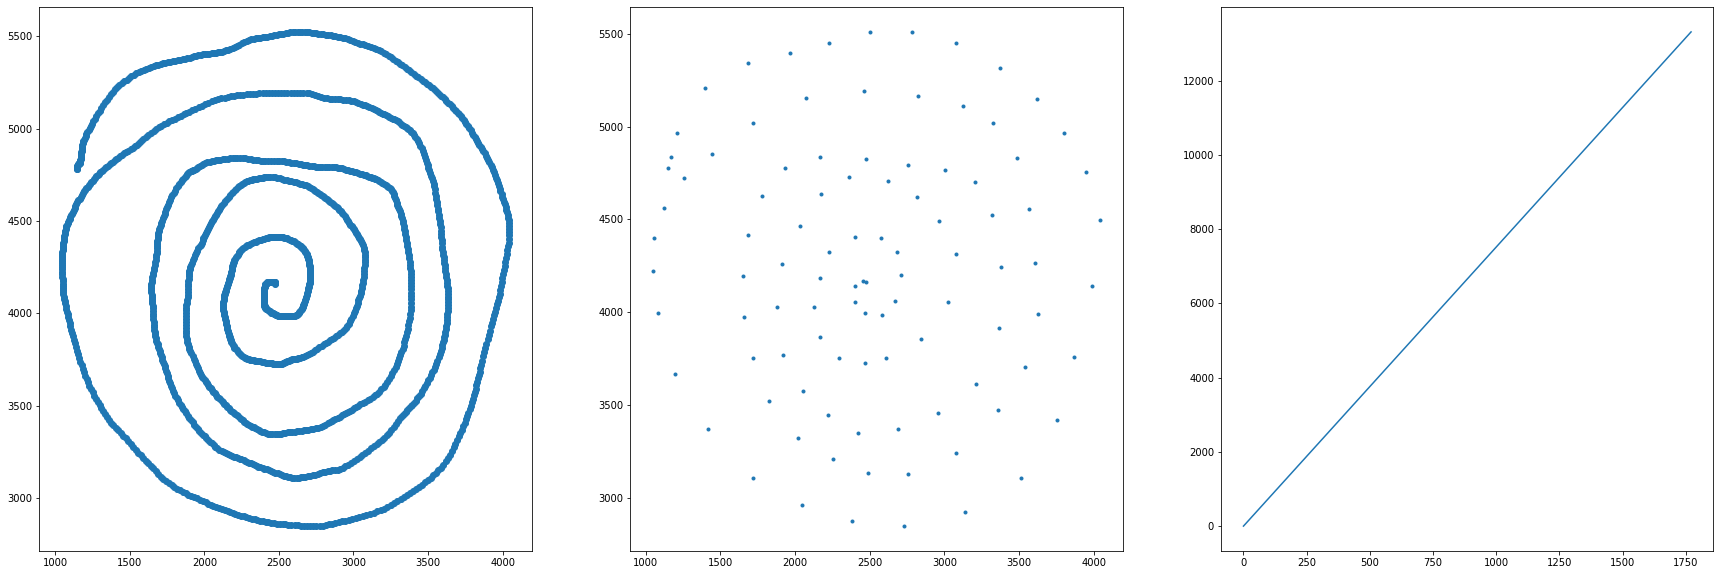

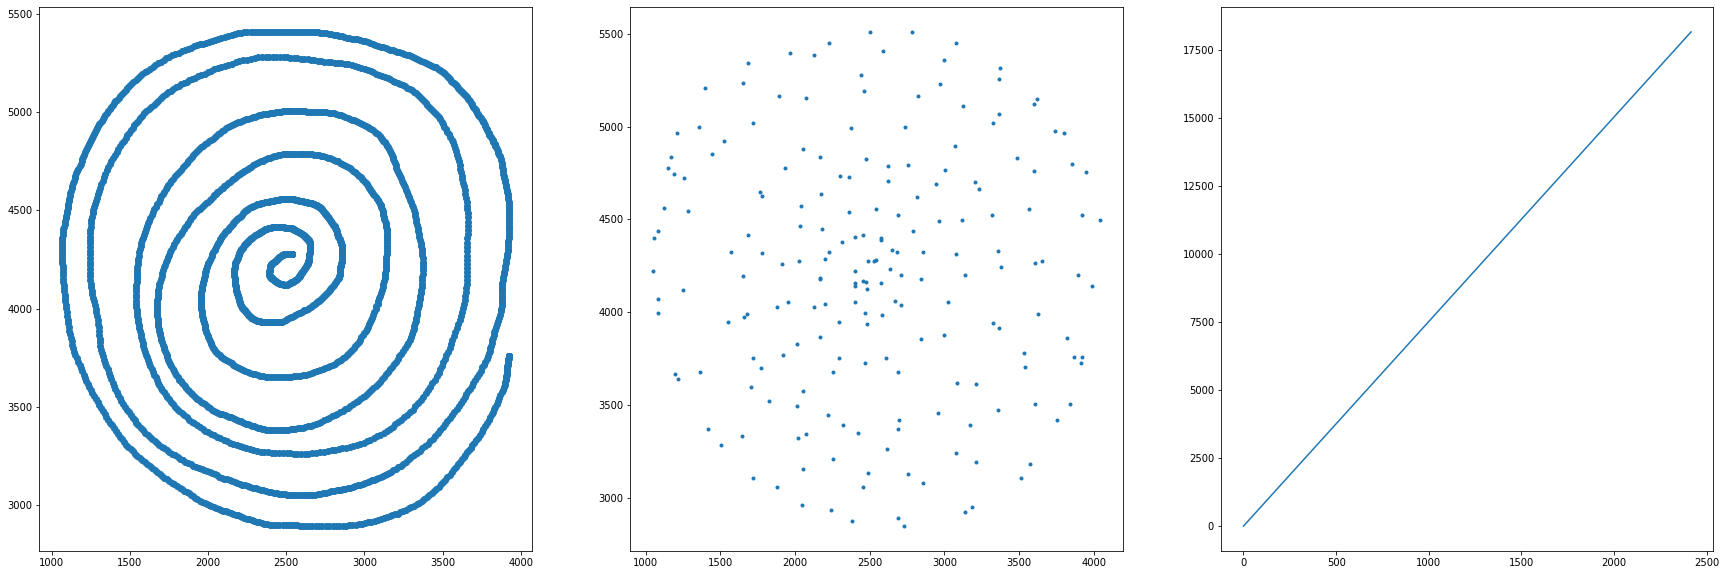

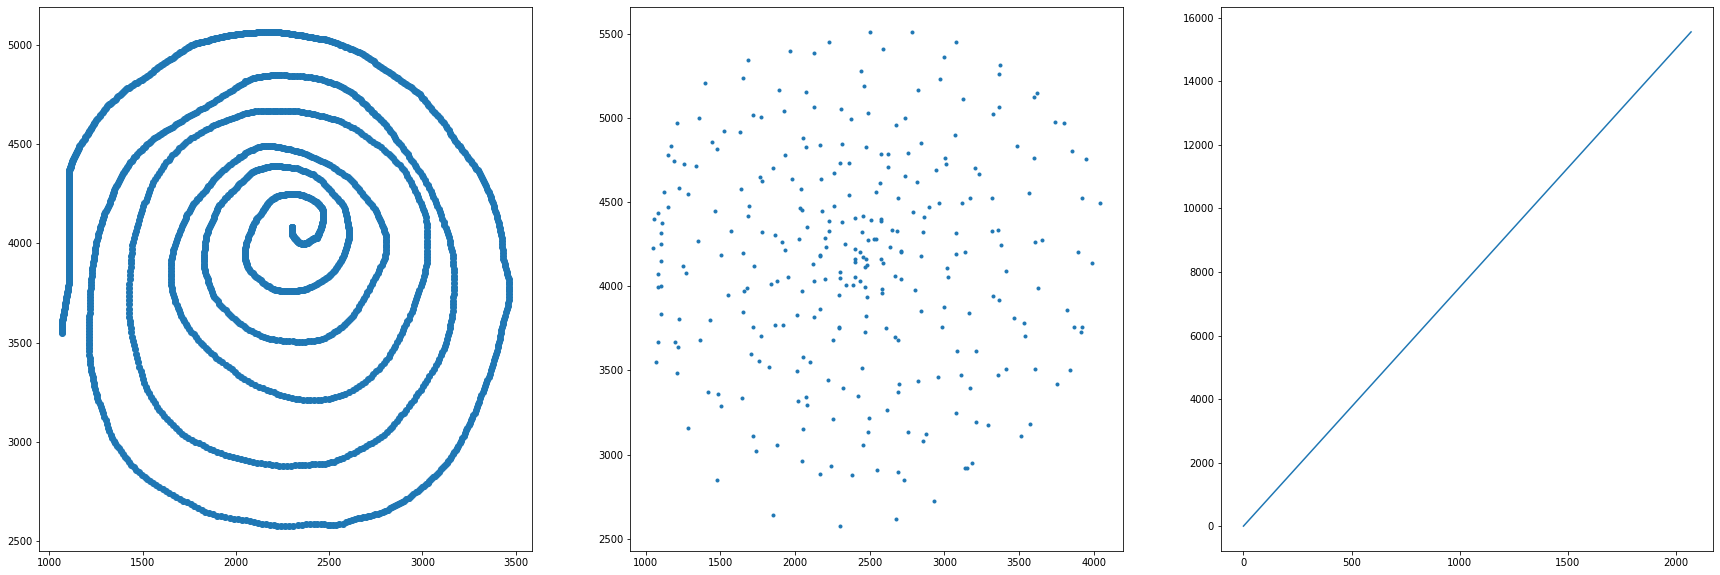

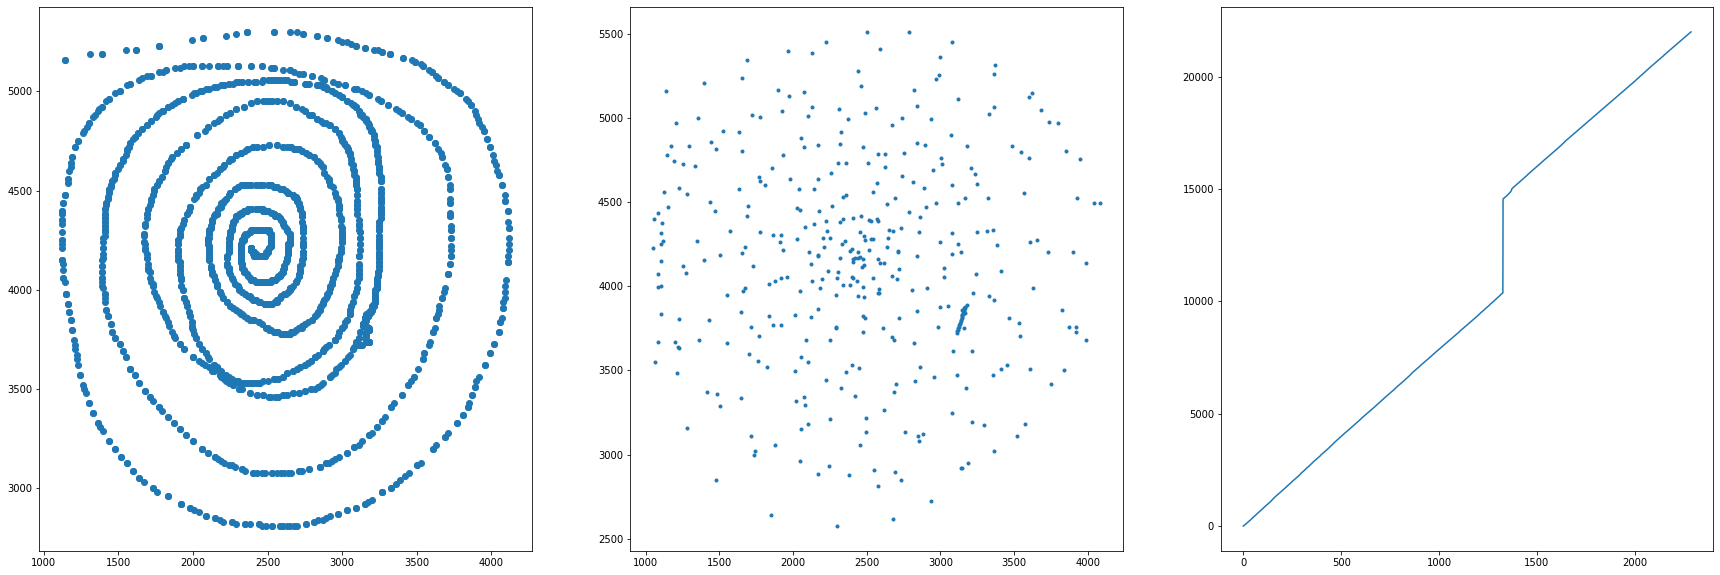

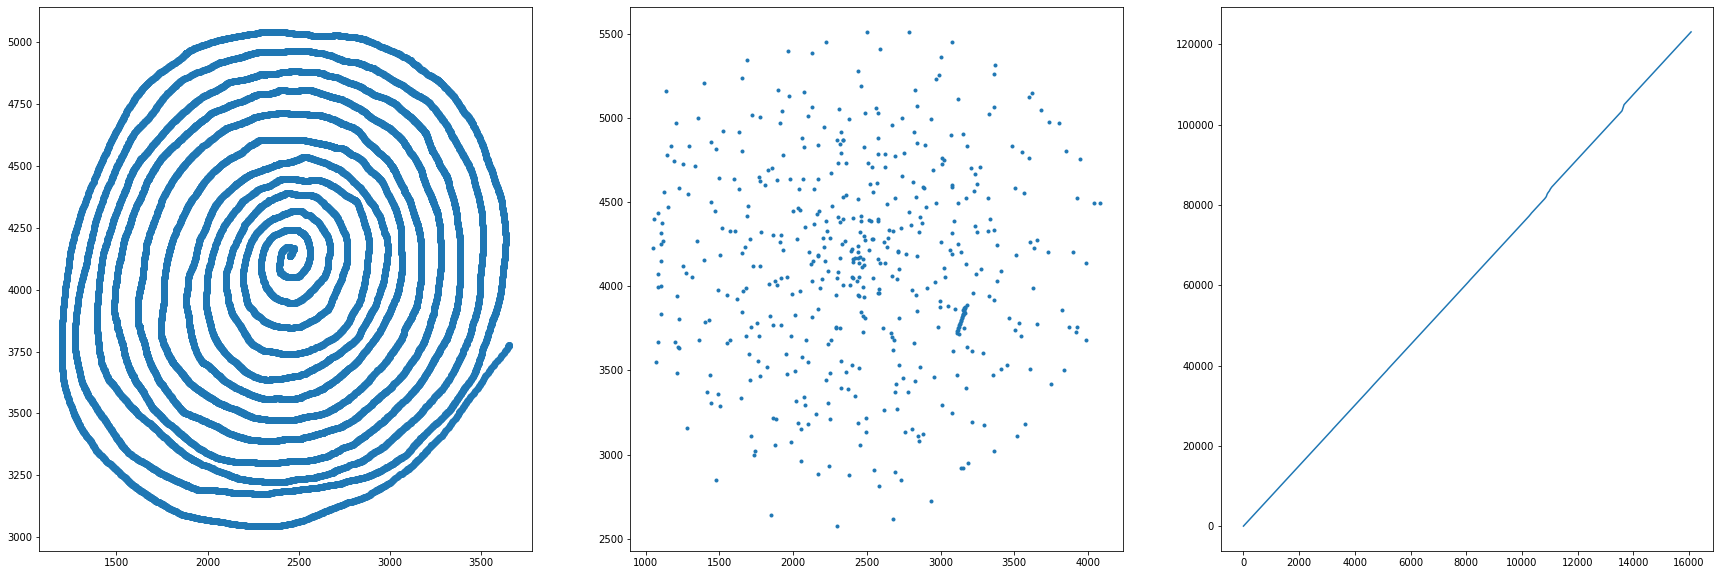

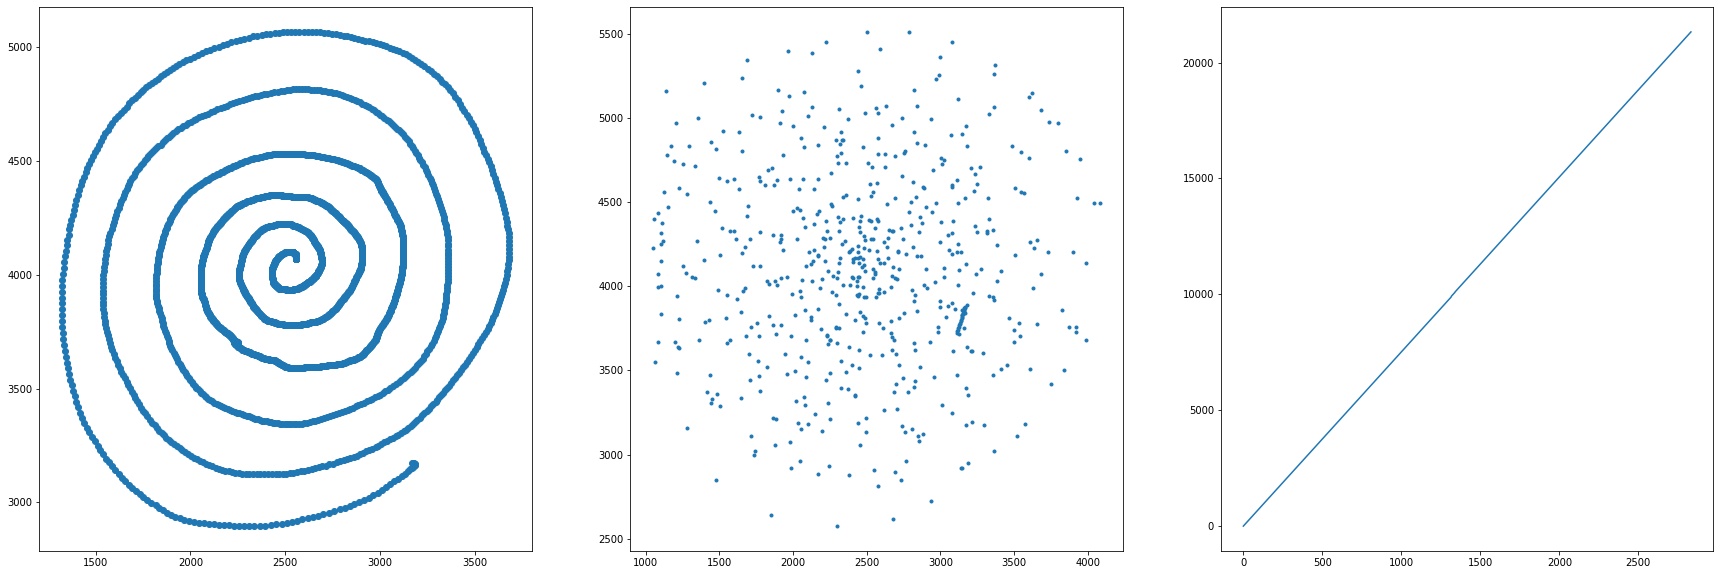

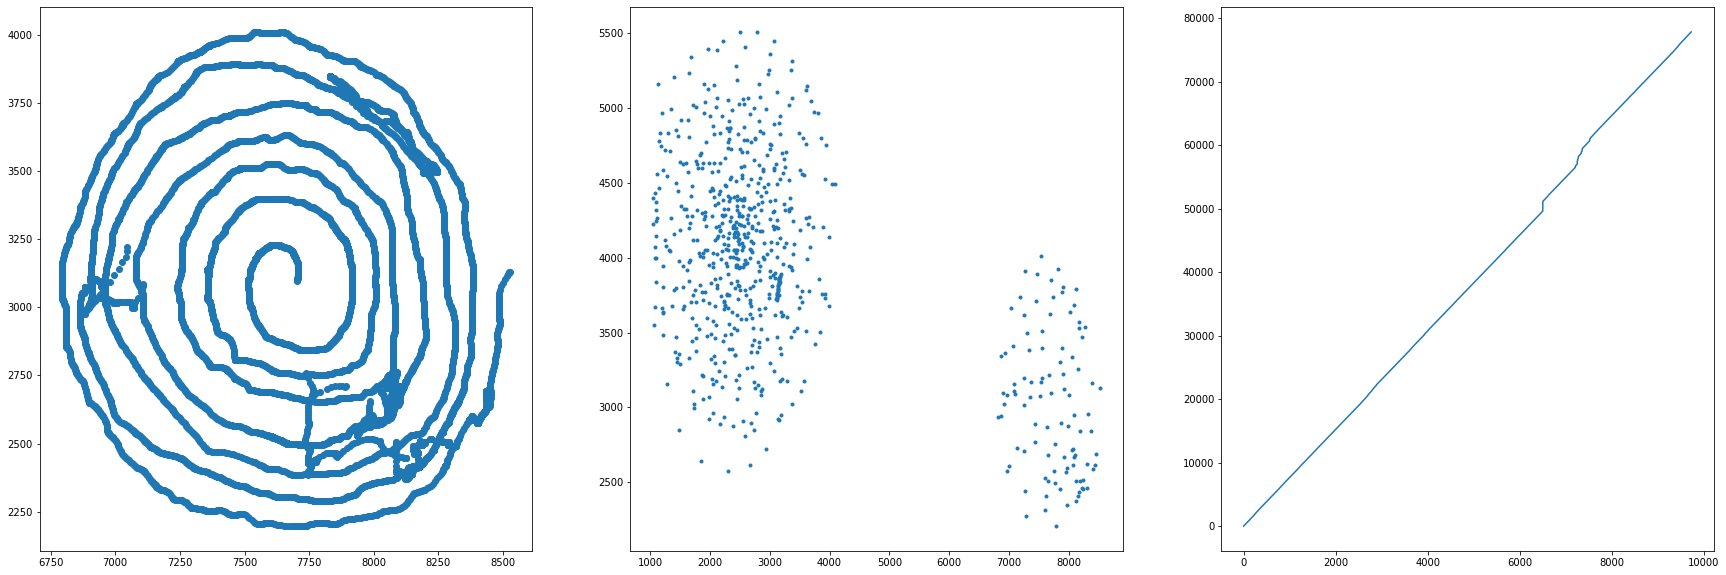

In [ ]:
n = 2 #number of dimensions
T = 100 #number of points on each curve
K = 7 #number of curves

beta = np.zeros((n, T, K))

newXs = []
newYs = []
for i in range(K):
    df = pd.read_csv('/work/PaHaW_spirals/0000'+str(1 + i)+'__1_1.csv', header = None) #read files 26-32
    xs = df[0]
    ys = df[1]
    ts = df[2]
    newXs.append(np.interp(np.linspace(np.min(ts),np.max(ts),T), ts, xs))
    newYs.append(np.interp(np.linspace(np.min(ts),np.max(ts),T), ts, ys))

    plt.figure(figsize = (30, 10))
    plt.subplot(1, 3, 1)
    plt.scatter(xs, ys)
    plt.subplot(1, 3, 2)
    plt.scatter(newXs,newYs, marker = '.')
    plt.subplot(1, 3, 3)
    plt.plot(ts)

    beta[0, :, i] = newXs[i]
    beta[1, :, i] = newYs[i]

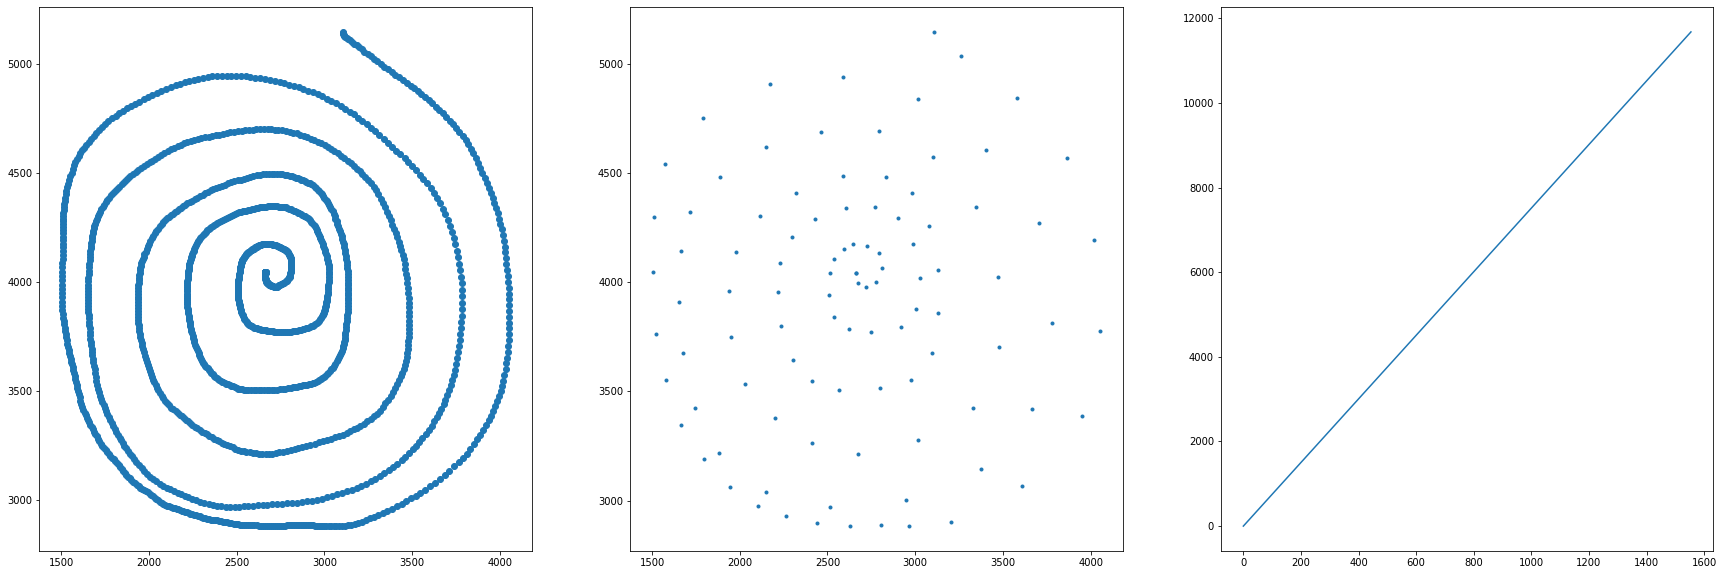

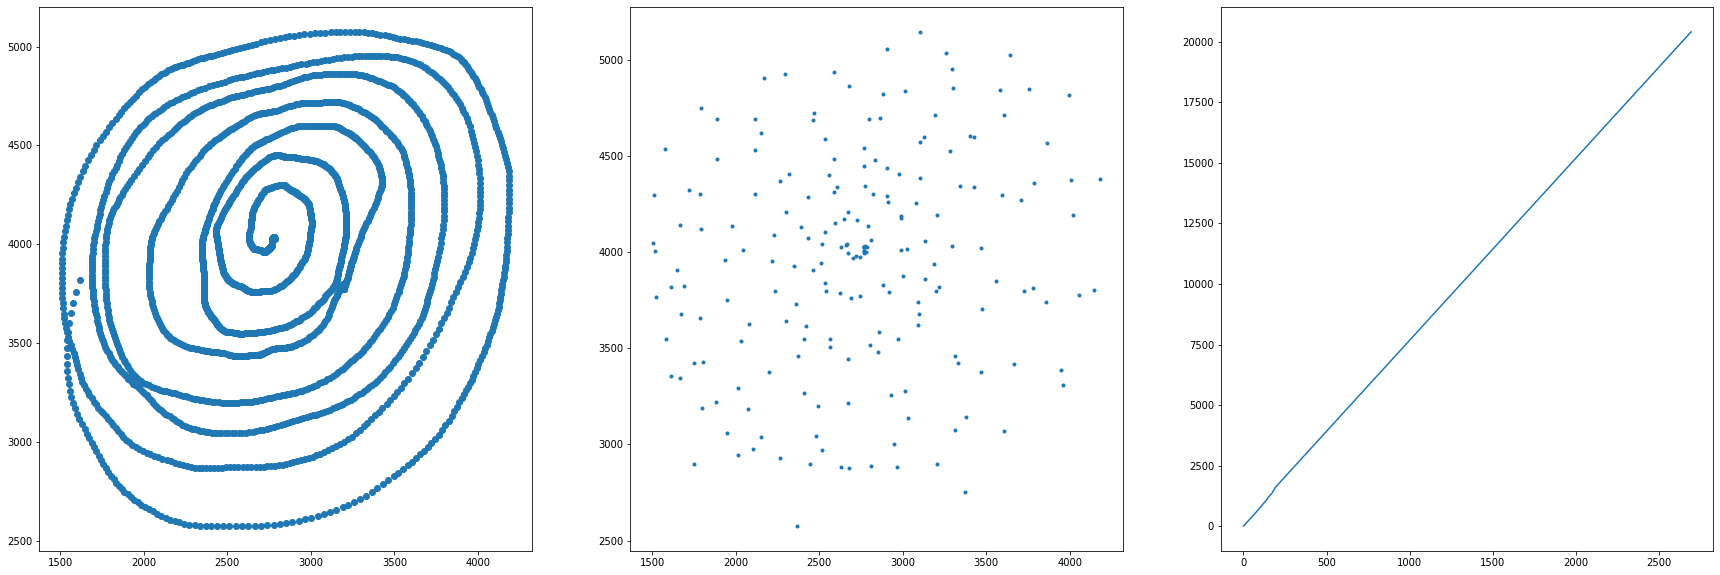

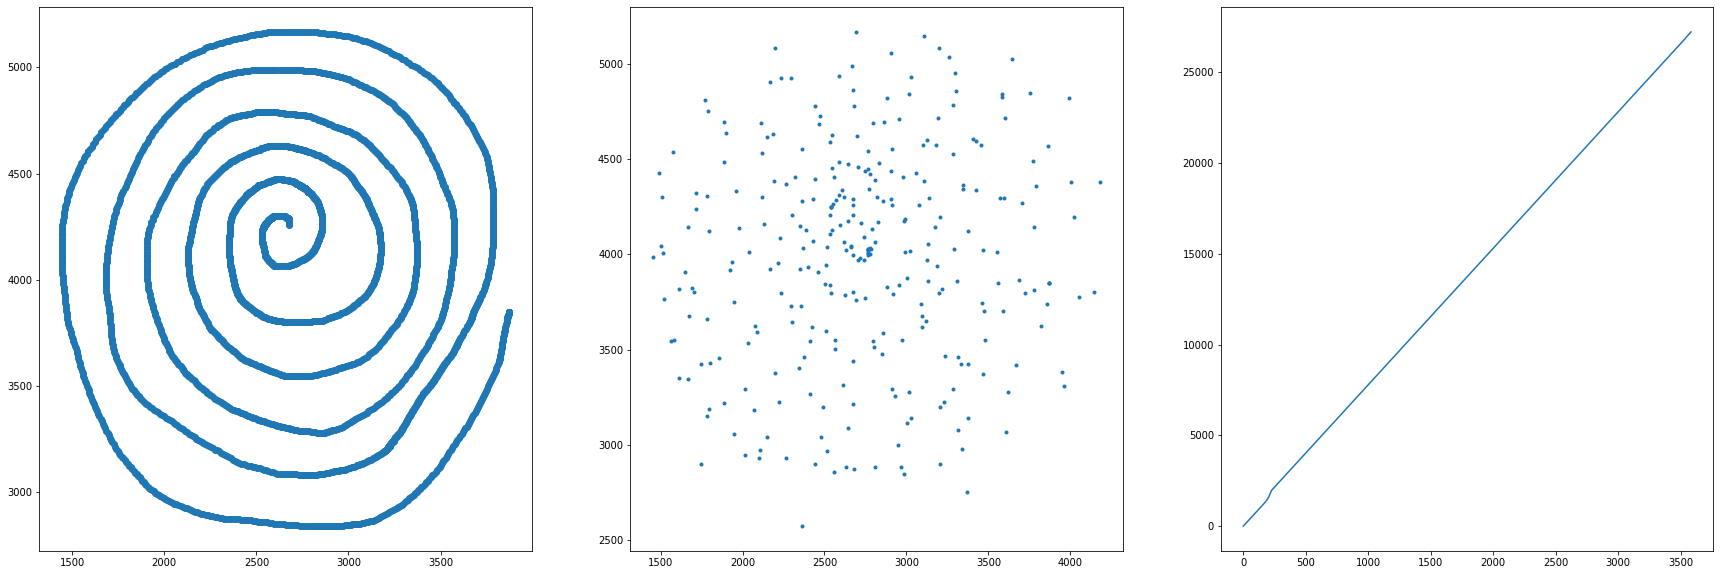

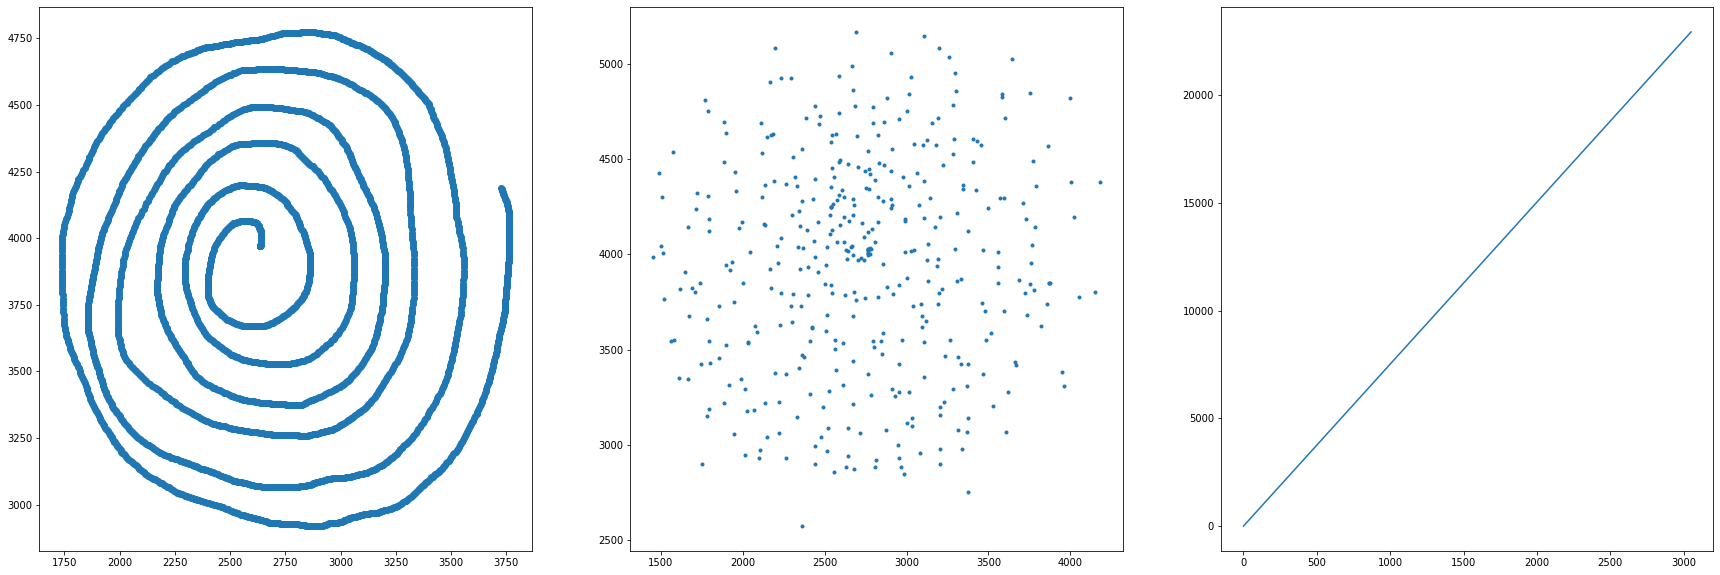

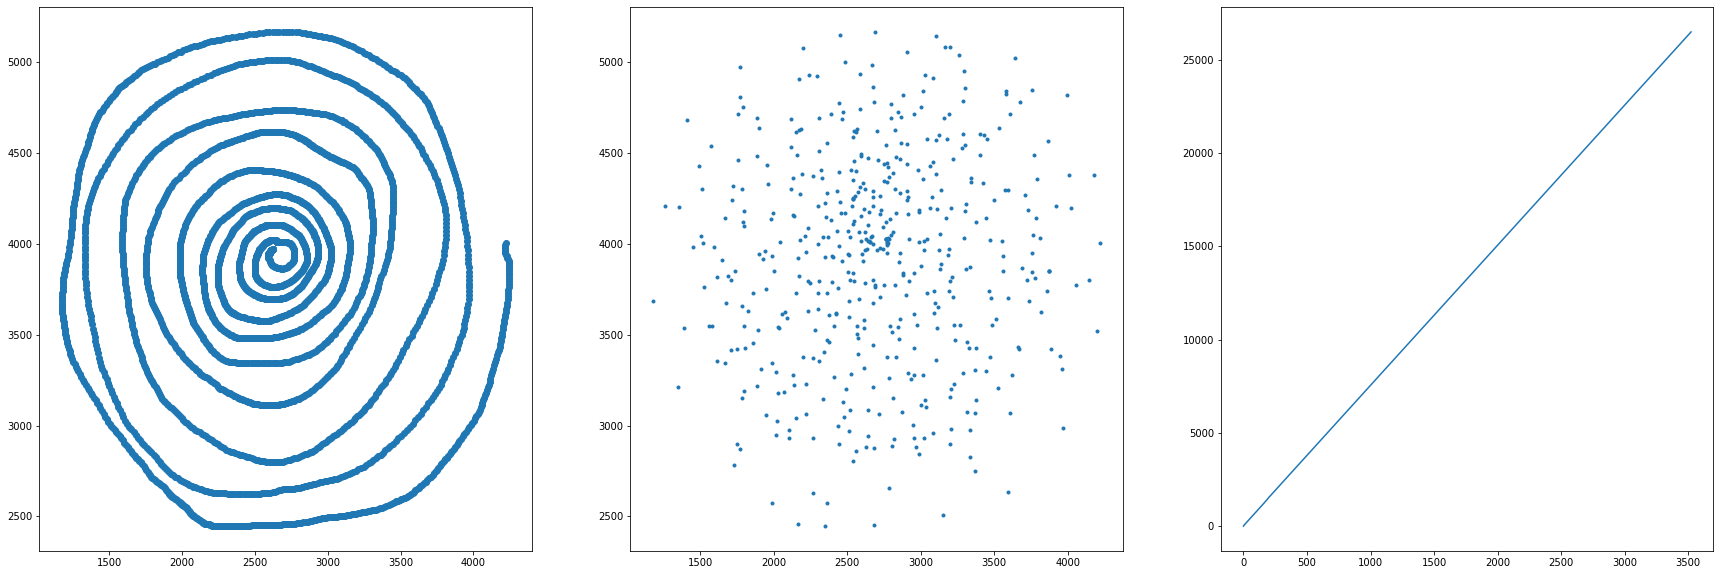

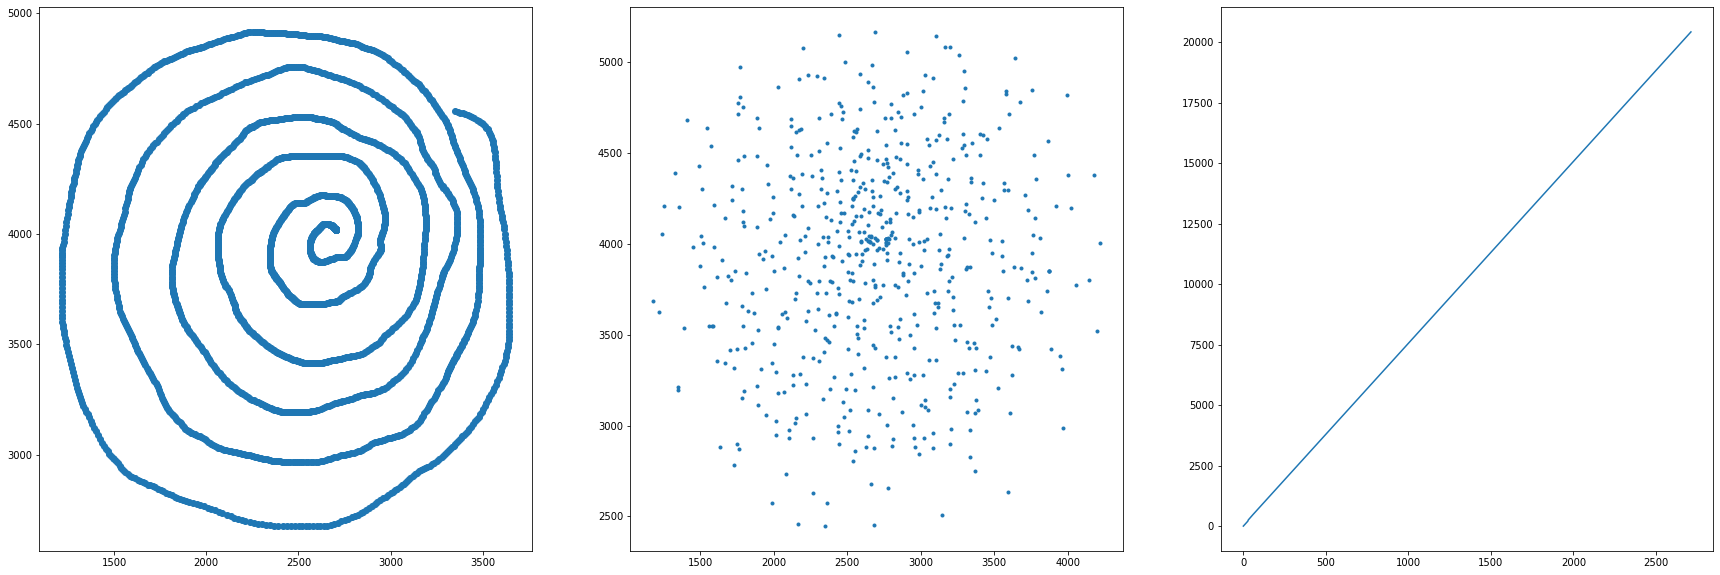

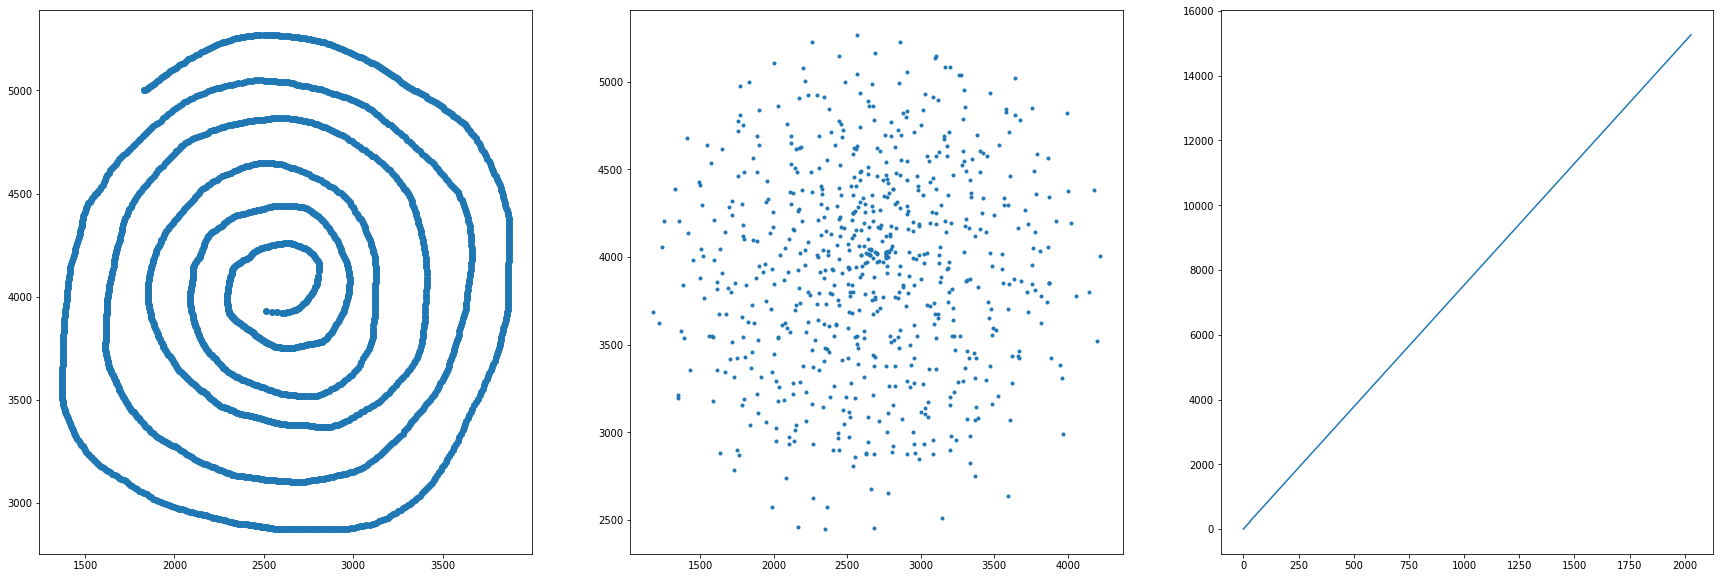

In [ ]:
n = 2 #number of dimensions
T = 100 #number of points on each curve
K = 7 #number of curves

beta = np.zeros((n, T, K))

newXs = []
newYs = []
for i in range(K):
    df = pd.read_csv('/work/PaHaW_spirals/000'+str(26+i)+'__1_1.csv', header = None) #read files 26-32
    xs = df[0]
    ys = df[1]
    ts = df[2]
    newXs.append(np.interp(np.linspace(np.min(ts),np.max(ts),T), ts, xs))
    newYs.append(np.interp(np.linspace(np.min(ts),np.max(ts),T), ts, ys))

    plt.figure(figsize = (30, 10))
    plt.subplot(1, 3, 1)
    plt.scatter(xs, ys)
    plt.subplot(1, 3, 2)
    plt.scatter(newXs,newYs, marker = '.')
    plt.subplot(1, 3, 3)
    plt.plot(ts)

    beta[0, :, i] = newXs[i]
    beta[1, :, i] = newYs[i]

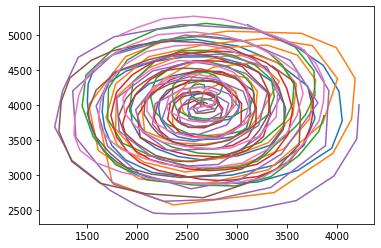

In [ ]:
for i in range(K):
    plt.plot(beta[0, :, i], beta[1, :, i])

In [ ]:
for i in range(7):
    print (sum(np.diff(beta[0, :, i]) == 0))

In [ ]:
plt.subplot(1, 2, 1)
for i in range(K):
    plt.plot(beta[0, :, i])

plt.subplot(1, 2, 2)
for i in range(K):
    plt.plot(beta[1, :, i])

In [ ]:
# create a curve registration object
curve = fdasrsf.curve_stats.fdacurve(beta, 'O')
# align curves (this make take some time!)
curve.srvf_align()

In [ ]:
curve.plot()

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Original X')
for i in range(K):
    plt.plot(beta[0, :, i])

plt.subplot(1, 2, 2)
plt.title('Original Y')
for i in range(K):
    plt.plot(beta[1, :, i])


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Aligned X')
for i in range(K):
    plt.plot(curve.betan[0, :, i])

plt.subplot(1, 2, 2)
plt.title('Aligned Y')
for i in range(K):
    plt.plot(curve.betan[1, :, i])

In [ ]:
df = pd.read_csv('/work/PaHaW_spirals/000'+str(26+i)+'__1_1.csv', header = None)



In [ ]:
t = np.linspace(0, 1, T)

output = fdasrsf.time_warping.fdawarp(np.array(newXs).T, t)
output.srsf_align()

plt.figure()
plt.plot(t, np.array(newXs).T)
plt.title('Original')

plt.figure()
plt.plot(t, output.fn)
plt.plot(t, output.fmean - output.fmean[0], 'k--')
plt.title('Aligned Functions', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)

plt.figure()
plt.plot(t, output.gam)
plt.plot(t, t, 'k--')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Initial Time Axis', fontsize=12)
plt.ylabel('Final Time Axis', fontsize=12)
plt.title('Warping Functions', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(K):
    df = pd.read_csv('/work/PaHaW_spirals/000'+str(26+i)+'__1_1.csv', header = None) #read files 26-32
    plt.subplot(2, 2, 1)
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label='DF %d' % i)
    plt.title('X and Y Coordinates')
    plt.subplot(2, 2, 2)
    plt.plot(df.iloc[:, 2], label='DF %d' % i)
    plt.title('')
    plt.subplot(2, 2, 3)
    plt.plot(df.iloc[:, 3], label='DF %d' % i)
    plt.title('')
    plt.subplot(2, 2, 4)
    plt.plot(df.iloc[:, 4], label='DF %d' % i)
    plt.title('')